# meng 21200 pset 6

### init

In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import warnings
from scipy.stats import linregress

warnings.filterwarnings('ignore')

### problem 1

a

In [15]:
def generate(n):
    '''
    :param n: size
    :return: [matrix, vector]
    '''

    return [np.random.uniform(-10, 10, size=(n, n)), np.random.uniform(-10, 10, size=(n, 1))]


b

In [16]:
sizes = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
times = []
for n in sizes:
    [A, b] = generate(n)
    x = np.zeros(n)
    startTime = time()

    # Gaussian elimination
    for i in range(n - 1):
        for j in range(i + 1, n):
            iRow = A[i]
            jRow = A[j]

            factor = iRow[i] / jRow[i]
            row = jRow - factor * iRow
            b[j] -= factor * b[i]
            A[j] = row

    # substitution
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= x[j] * A[i, j]
        x[i] /= A[i, i]

    finishTime = time()
    times.append(finishTime - startTime)

Text(0.5, 1.0, 'time taken vs size of matrix')

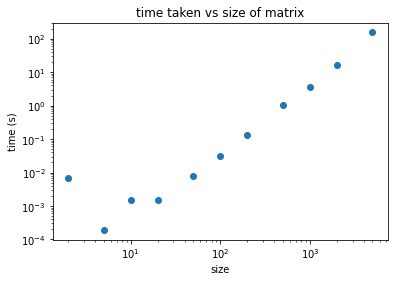

In [17]:
plt.scatter(sizes, times)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('size')
plt.ylabel('time (s)')
plt.title('time taken vs size of matrix')

c

slope: 1.9176
r-value: 0.9945


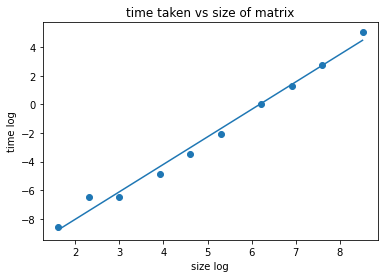

In [22]:
sizesLog = np.log(sizes[1:])
timesLog = np.log(times[1:])
m, b, r, _, _ = linregress(sizesLog, timesLog)

xlist = np.linspace(sizesLog[0], sizesLog[-1])
plt.scatter(sizesLog, timesLog)

plt.xlabel('size log')
plt.ylabel('time log')
plt.title('time taken vs size of matrix')
plt.plot(xlist, xlist * m + b)
print(f'slope: {round(m, 4)}')
print(f'r-value: {round(r, 4)}')

The complexity of Gaussian elimination is $O(N^3)$. However, the slope of the graph is 1.98, with an r-value of 0.9985, which implies a complexity of $O(N^2)$. These do not match.

d

In [41]:
times_ = []
for n in sizes:
    [A, b] = generate(n)
    startTime = time()
    x = np.linalg.solve(A, b)
    finishTime = time()
    times_.append(finishTime - startTime)

Text(0.5, 1.0, 'time taken vs size of matrix')

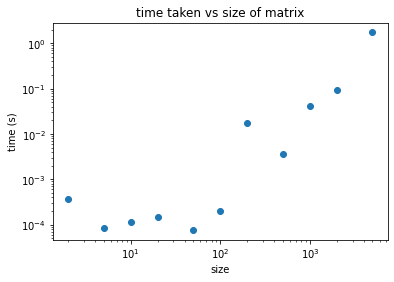

In [42]:
plt.scatter(sizes, times_, label='library code')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('size')
plt.ylabel('time (s)')
plt.title('time taken vs size of matrix')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


slope: 1.9176
r-value: 0.9945


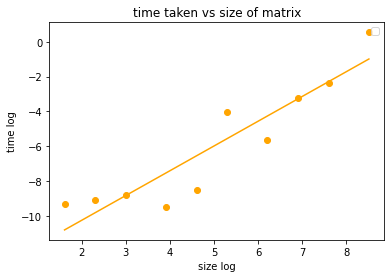

In [45]:
plt.legend()
sizesLog = np.log(sizes[1:])
timesLog_ = np.log(times_[1:])
m_, b_, r_, _, _ = linregress(sizesLog, timesLog_)

xlist = np.linspace(sizesLog[0], sizesLog[-1])
plt.scatter(sizesLog, timesLog_, color='orange')

plt.xlabel('size log')
plt.ylabel('time log')
plt.title('time taken vs size of matrix')
plt.plot(xlist, xlist * m_ + b_, color='orange')
print(f'slope: {round(m, 4)}')
print(f'r-value: {round(r, 4)}')

handwritten slope: 1.9176
handwritten r-value: 0.9945
library slope: 1.4228
library r-value: 0.9235


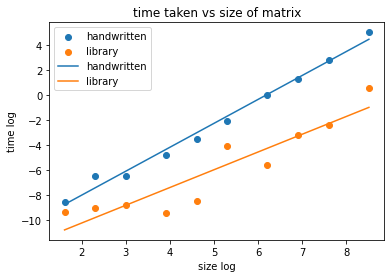

In [47]:
sizesLog = np.log(sizes[1:])
timesLog = np.log(times[1:])
timesLog_ = np.log(times_[1:])
xlist = np.linspace(sizesLog[0], sizesLog[-1])
plt.xlabel('size log')
plt.ylabel('time log')
plt.title('time taken vs size of matrix')

plt.scatter(sizesLog, timesLog, label='handwritten')
plt.scatter(sizesLog, timesLog_, label='library')

m, b, r, _, _ = linregress(sizesLog, timesLog)
plt.plot(xlist, xlist * m + b, label='handwritten')
print(f'handwritten slope: {round(m, 4)}')
print(f'handwritten r-value: {round(r, 4)}')

m_, b_, r_, _, _ = linregress(sizesLog, timesLog_)
plt.plot(xlist, xlist * m_ + b_, label='library')
print(f'library slope: {round(m_, 4)}')
print(f'library r-value: {round(r_, 4)}')

plt.legend()

The complexity of Gaussian elimination is $O(N^3)$. However, the slope of the graph is 1.42, with an r-value of 0.9235, which implies a complexity of $O(N^1.5)$. These do not match.

### problem 2

a

In [58]:
def LU(matrix):
    l = len(matrix)
    L = np.identity(l)
    U = np.zeros((l, l))

    for j in range(l):
        U[0][j] = matrix[0][j]

    for i in range(1, l):
        L[i][0] = matrix[i][0] / U[0][0]

    for i in range(1, l):
        for j in range(i, l):
            s = 0
            for k in range(i):
                s += L[i][k] * U[k][j]
            U[i][j] = matrix[i][j] - s

        for j in range(i + 1, l):
            s = 0
            for k in range(i):
                s += L[j][k] * U[k][i]
            L[j][i] = (matrix[j][i] - s) / U[i][i]

    return L, U

b

In [68]:
def invert(L, U):
    l = len(L)
    matrix = np.identity(l)

    for k in range(l):
        x = np.zeros(l)
        y = np.zeros(l)
        y[0] = matrix[0][k] / L[0][0]

        for i in range(1, l):
            s = 0
            for j in range(i):
                s += L[i][j] * y[j]
            y[i] = (matrix[i][k] - s) / L[i][i]

        x[l - 1] = y[l - 1] / U[l - 1][l - 1]

        for i in range(l - 2, -1, -1):
            s = 0
            for j in range(i + 1, l):
                s += U[i][j] * x[j]
            x[i] = (y[i] - s) / U[i][i]

        matrix[:, k] = x

    return matrix

c

In [70]:
A = np.array([[6, 1, -5, 3], [2, 4, 5, 6], [2, 3, 7, 1], [1, 2, 0, -2]])
L, U = LU(A)
inv = invert(L, U)


print('L:')
print(L, '\n')
print('U:')
print(U, '\n')
print('Inverse: ')
print(inv, '\n')

L:
[[ 1.          0.          0.          0.        ]
 [ 0.33333333  1.          0.          0.        ]
 [ 0.33333333  0.72727273  1.          0.        ]
 [ 0.16666667  0.5        -0.6547619   1.        ]] 

U:
[[ 6.          1.         -5.          3.        ]
 [ 0.          3.66666667  6.66666667  5.        ]
 [ 0.          0.          3.81818182 -3.63636364]
 [ 0.          0.          0.         -7.38095238]] 

Test Inverse: 
[[ 0.16129032 -0.15483871  0.22580645 -0.10967742]
 [-0.07258065  0.20967742 -0.2016129   0.41935484]
 [-0.01612903 -0.06451613  0.17741935 -0.12903226]
 [ 0.00806452  0.13225806 -0.08870968 -0.13548387]] 



d

In [73]:
print('linalg.inv:')
print(np.linalg.inv(A))

linalg.inv
[[ 0.16129032 -0.15483871  0.22580645 -0.10967742]
 [-0.07258065  0.20967742 -0.2016129   0.41935484]
 [-0.01612903 -0.06451613  0.17741935 -0.12903226]
 [ 0.00806452  0.13225806 -0.08870968 -0.13548387]]


Function produces same result as library.

e

In [75]:
def det(L, U):
    detL = np.prod(np.diag(L))
    detU = np.prod(np.diag(U))
    return detL * detU

In [76]:
L, U = LU(A)
print(f'det(A) = {round(det(L, U), 1)}')

det(A) = -620.0


### problem 3

a

In [78]:
A = np.array([[1, 2 , 3, -5],
           [2, 5, 4, -1],
           [1, -1, 10, 2],
           [3, -2, 5., -3]])
b = np.array([-44, 8., 44, -16])

print(np.linalg.solve(A, b))

[ 3.  1.  2. 11.]


b

In [116]:
def guess(a0, b0):
    l = len(a0)
    a = []
    b = []

    for i in range(l):
        r = (0, -80)
        for j in range(l):
            x = abs(a0[j][i])
            if x > r[0]:
                r = (x, j)
        a.append(a0[r[1]])
        b.append(b0[r[1]])
    return a, b

In [125]:
def f(a0, b0, omega=1):
    tol = 0.001
    a, b = guess(a0, b0)
    x = [np.ones(len(b))]
    maxError = 1
    while maxError > tol:
        maxError = 0
        c = []
        for i in range(len(a)):
            sum = 0
            d = b[i]
            for j in range(len(c)):
                sum += (a[i][j] * c[j])
            for j in range(len(c), len(a[i])):
                sum += (a[i][j] * x[-1][j])

            c.append(x[-1][i] + omega * (d - sum) / (a[i][i]))
            error = abs((c[i] - x[-1][i]) / x[-1][i])
            if error > maxError:
                maxError = error
        x.append(c)
    return x

In [128]:
soln = f(A, b)
nlist = np.linspace(0, len(soln), len(soln))

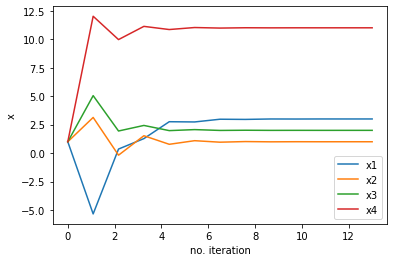

In [129]:
x1 = [i[0] for i in soln]
x2 = [i[1] for i in soln]
x3 = [i[2] for i in soln]
x4 = [i[3] for i in soln]

plt.plot(nlist, x1,label = 'x1')
plt.plot(nlist, x2, label = 'x2')
plt.plot(nlist, x3,label = 'x3')
plt.plot(nlist, x4,label = 'x4')
plt.xlabel('no. iteration')
plt.ylabel('x')
plt.legend()

c

In [130]:
soln = f(A, b, omega=0.95)
nlist = np.linspace(0, len(soln), len(soln))

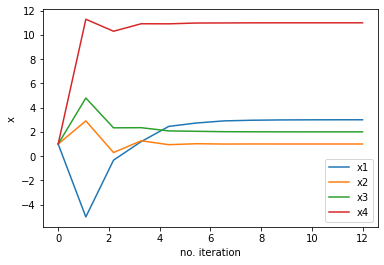

In [131]:
x1 = [i[0] for i in soln]
x2 = [i[1] for i in soln]
x3 = [i[2] for i in soln]
x4 = [i[3] for i in soln]

plt.plot(nlist, x1,label = 'x1')
plt.plot(nlist, x2, label = 'x2')
plt.plot(nlist, x3,label = 'x3')
plt.plot(nlist, x4,label = 'x4')
plt.xlabel('no. iteration')
plt.ylabel('x')
plt.legend()

### problem 4

a

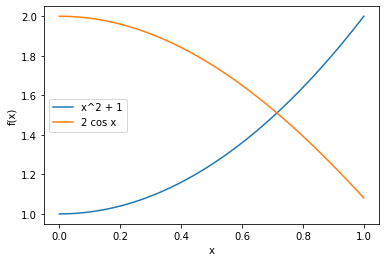

In [101]:
def f1(x):
    return x ** 2 + 1
def f2(x):
    return 2 * np.cos(x)

xlist = np.linspace(0, 1)

plt.plot(xlist, f1(xlist),label='x^2 + 1')
plt.plot(xlist, f2(xlist),label='2 cos x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

b

In [102]:
# guesses
x = 0.7
y = 1.5

while abs(f1(x) - f2(x)) > 0.001:
    x = np.sqrt(y - 1)
    y = np.sqrt(2 * np.cos(x) + y ** 2 - y)

print(f'the solution is {round(x, 4)}, {round(y, 4)}')

the solution is 0.7143, 1.5105


c

In [98]:
def jacobian(x1, x2):
    return np.array([[2 * x1, -1],
                     [-2 * np.sin(x1), -1]])
def diff(x1, x2):
    a = f(x1, x2)
    return abs(a[0]) + abs(a[1])
def f(x1, x2):
    return np.array([x1 ** 2 + 1 - x2,
                     2 * np.cos(x1) - x2])

In [99]:
x1, x2 = [0.7, 1.5]
tol = 0.001
while diff(x1, x2) > tol:
    x1, x2 = np.array([x1, x2]) - np.matmul(np.linalg.inv(jacobian(x1, x2)), f(x1, x2))

print(f'the solution is {round(x1, 4)}, {round(x2, 4)}')

the solution is 0.7148, 1.5107


### problem 5

a

In [96]:
def jacobian(x1, x2, x3):
    return np.array([[3 * x2, 1, -1],
                     [1 - 2 * x1 * x2, -x1 ** 2, 1],
                     [1, -1, -1]])
def diff(x1, x2, x3):
    a = f(x1, x2, x3)
    return abs(a[0]) + abs(a[1]) + abs(a[2])
def f(x1, x2, x3):
    return np.array([3 * x1 * x2 + x2 - x3 - 12,
                     x1 - x1 ** 2 * x2 + x3 - 12,
                     x1 - x2 - x3 + 2])

In [97]:
x1, x2, x3 = [0, 0, 0]
tol = 0.0001
while diff(x1, x2, x3) > tol:
    x1, x2, x3 = np.array([x1, x2, x3]) - np.matmul(np.linalg.inv(jacobian(x1, x2, x3)), f(x1, x2, x3))

print(f'the solution is {round(x1, 4)}, {round(x2, 4)}, {round(x3, 4)}')

the solution is -2.6535, -1.9036, 1.2502


b

Need to set the initial guess very close to the answer for the method to converge

In [10]:
beta = 0.0001
x1, x2, x3 = [-2.65, -1.9, 1.25]
tol = 0.01
while diff(x1, x2, x3) > tol:
    x1, x2, x3 = np.array([x1, x2, x3]) + beta * f(x1, x2, x3)

print(f'the solution is {round(x1, 4)}, {round(x2, 4)}, {round(x3, 4)}')

the solution is -2.6528, -1.9037, 1.2501
